<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 0

*Roman Ordoñez*

### Consignas

1. Obtener la funcion transferencia $\frac{V2}{V1}$; modulo, fase y diagrama de polos y ceros
2. Proponga una norma de frecuencia e imedancia de forma tal de llegar a una **transferencia normalizada**
3. Simule la **transferencia normalizada** en Python
4. Simule la red en *LTSpice* y obtenga su respuesta en frecuencia
5. ¿Qué tipo de filtro es? Analizar el caso del [MF-103](https://www.synthxl.com/wp-content/uploads/2020/04/Moog-MF-103-Schematics.pdf) ¿Utiliza la misma red?

### Desarrollo Cuaderno

Para comenzar la resolucion de la misma, obtuve mediante Kirchhoff, la transferencia $T(s)$ ademas de graficar su diagrama de polos y ceros. Además defini la $\omega_0$ y una constante $a$, esta ultima fue normalizada a 1 aunque el valor de la misma afecta el funcionamiento del filtro. 
\begin{equation}
T(s) = \frac{s-\frac{R2}{C1R1R3}}{s+\frac{1}{C1R3}}
\end{equation}
$\omega_0 = \frac{1}{C1R3}$ y $a = \frac{R2}{R1}$

<img src="20250510_200256.jpg" width="500"/>

<img src="20250510_200307.jpg" width="500" >

Suponiendo $a=1$, podemos determinar la igualidad $R1=R2$

Para la normalizacion en frecuencia, busco que $\omega_0 = 1$ por lo tanto, $C1 = \frac{1}{R3}$. Con estos parametros asignados, 
\begin{equation}
T(s) = \frac{s-1}{s+1}
\end{equation}

Ahora para normalizar impedancia, elegi $R3=1$ para poder simplificar los componentes y los grados de libertad del circuito.
$R3=R1=R2=1$

<img src="20250510_200315.jpg" width="500"/>

<img src="20250510_200324.jpg" width="500">

En la esta ultima imagen queda expresado tanto el modulo como la fase del circito, quedando demostrado el funcionamiento como *Filtro Pasa Todo* aunque como dije anteriormente, el funcionamiento del mismo esta ligado a el valor tomado por $a$

### Python

Aca dejo lo que fue simulado en Python

/home/roman/entorno_virtual/lib/python3.12/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)
/home/roman/entorno_virtual/lib/python3.12/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


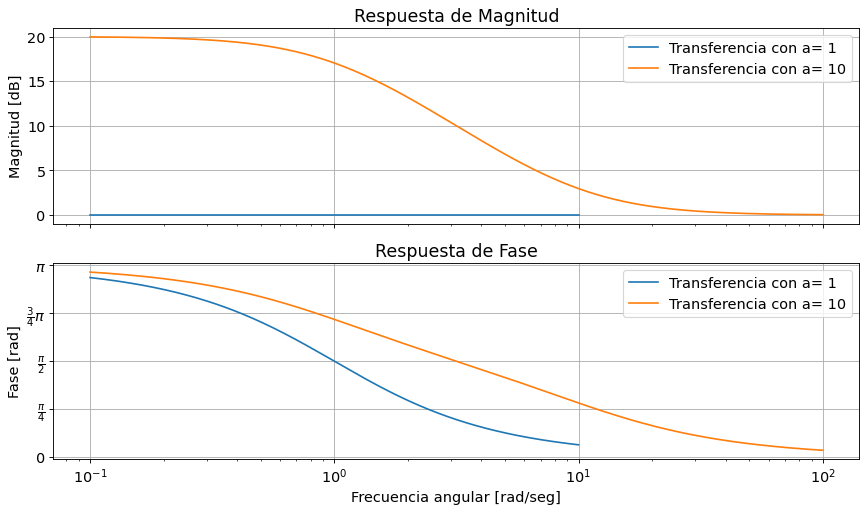

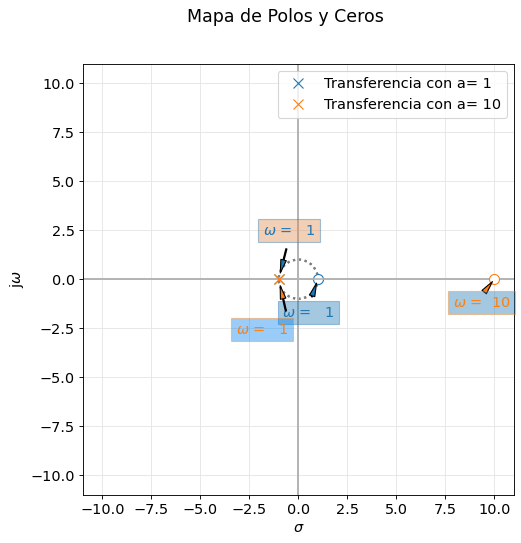

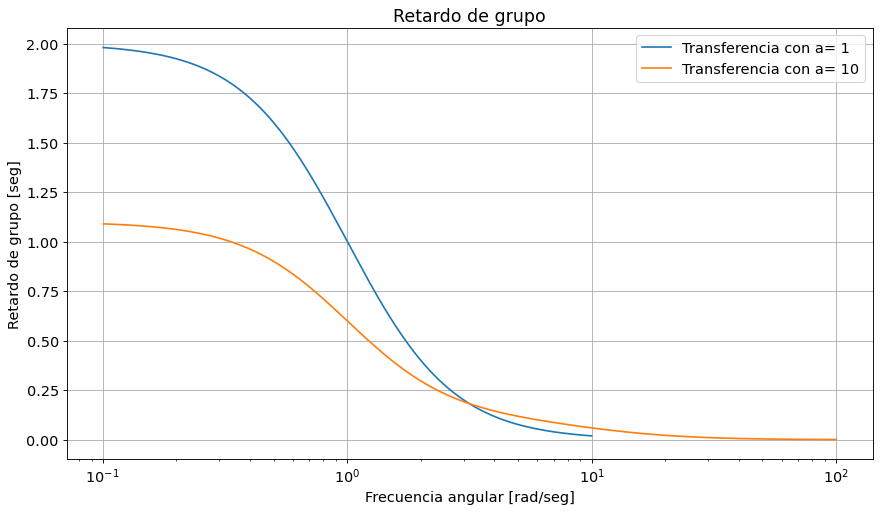

In [1]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s

w0 = 1
ganancia_k = [1,10]

for valor_k in ganancia_k:
    
    num = np.array([0,1,-valor_k *w0])
    den = np.array([0,1,w0])

    H1 = sig.TransferFunction(num, den)
    _ = analyze_sys([H1], sys_name='Transferencia con a= {}'.format(valor_k))

En el analisis de Python se puede apreciar dos transferencias con diferente $a$ pero en el que debemos centrarnos es el de color azul, con $a=1$

### Pregunta 5

Para responder la ultima pregunta, el filtro es un pasa todo y se encuentra en cascada en el MF-103 en la ultima parte del diseño.